**If you want to get a 10, do all of the above plus provide a BERT or an ELMO model for your data, comment on the differences in the results between the word2vec and the BERT/ELMO models.**

In [ ]:
import torch
from transformers import BertTokenizer, BertModel
import logging
import matplotlib.pyplot as plt
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = BertModel.from_pretrained("bert-base-multilingual-cased")

In [20]:
from string import punctuation

In [2]:
with open('strugackie2.txt') as f:
    text = f.read()

In [24]:
lines = text.splitlines() 

In [28]:
lines2= []
for l in lines:
    new_l = "[CLS] " + l + " [SEP]"
    lines2.append(new_l)
tex2 = '\n'.join(lines2)

In [29]:
def tokenize(s):
    words = ''
    p = list(punctuation)
    for i in range(len(s)):
        if s[i] in p:
            continue
        words = words + s[i]
    phrase = str(words)
    spltd = phrase.split()
    return spltd

In [42]:
tokenized = tokenize(tex2)
print(tokenized)

['CLS', 'Из', 'интервью', 'которое', 'специальный', 'корреспондент', 'Хармонтского', 'радио', 'взял', 'у', 'доктора', 'Валентина', 'Пильмана', 'по', 'случаю', 'присуждения', 'последнему', 'Нобелевской', 'премии', 'по', 'физике', 'за', '19', 'год', 'SEP', 'CLS', 'Вероятно', 'вашим', 'первым', 'серьезным', 'открытием', 'доктор', 'Пильман', 'следует', 'считать', 'так', 'называемый', 'радиант', 'Пильмана', 'SEP', 'CLS', 'Полагаю', 'что', 'нет', 'SEP', 'CLS', 'Радиант', 'Пильмана', 'это', 'не', 'первое', 'не', 'серьезное', 'и', 'собственно', 'не', 'открытие', 'SEP', 'CLS', 'И', 'не', 'совсем', 'мое', 'SEP', 'CLS', 'Вы', 'вероятно', 'шутите', 'доктор', 'SEP', 'CLS', 'Радиант', 'Пильмана', 'понятие', 'известное', 'всякому', 'школьнику', 'SEP', 'CLS', 'Это', 'меня', 'не', 'удивляет', 'SEP', 'CLS', 'Радиант', 'Пильмана', 'и', 'был', 'открыт', 'впервые', 'именно', 'школьником', 'SEP', 'CLS', 'К', 'сожалению', 'я', 'не', 'помню', 'как', 'его', 'звали', 'SEP', 'CLS', 'Посмотрите', 'у', 'Стетсона',

In [45]:
indexed_t = tokenizer.convert_tokens_to_ids(tokenized)
print(len(indexed_t))
print(len(tokenized))

26830
26830


In [46]:
segments_ids = [1] * len(tokenized)
print(len(segments_ids))

26830


In [54]:
tokens_tensor = torch.tensor([indexed_t[:511]])
segments_tensors = torch.tensor([segments_ids[:511]])

In [51]:
model = BertModel.from_pretrained('bert-base-multilingual-cased',
                                  output_hidden_states = True,
                                  )

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [52]:
model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(119547, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
         

In [55]:
with torch.no_grad():

    outputs = model(tokens_tensor, segments_tensors)

In [57]:
hidden_states = outputs[2]

In [58]:
print ("Number of layers:", len(hidden_states), "  (initial embeddings + 12 BERT layers)")
layer_i = 0

print ("Number of batches:", len(hidden_states[layer_i]))
batch_i = 0

print ("Number of tokens:", len(hidden_states[layer_i][batch_i]))
token_i = 0

print ("Number of hidden units:", len(hidden_states[layer_i][batch_i][token_i]))

Number of layers: 13   (initial embeddings + 12 BERT layers)
Number of batches: 1
Number of tokens: 511
Number of hidden units: 768


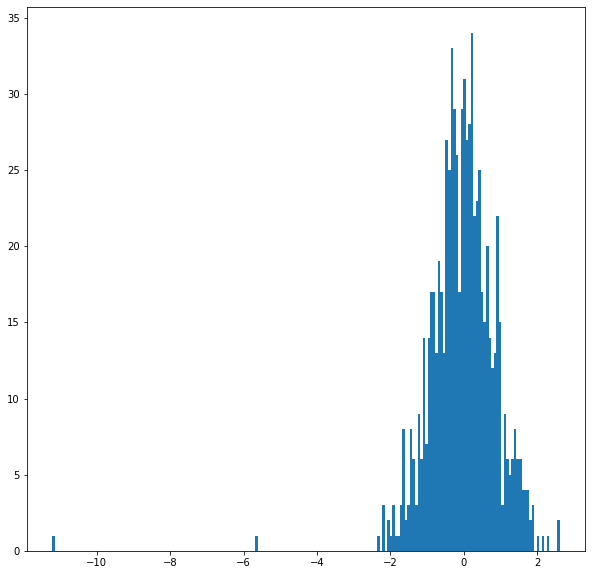

In [59]:
token_i = 5
layer_i = 5
vec = hidden_states[layer_i][batch_i][token_i]


plt.figure(figsize=(10,10))
plt.hist(vec, bins=200)
plt.show()

In [60]:
token_embeddings = torch.stack(hidden_states, dim=0)

token_embeddings.size()

torch.Size([13, 1, 511, 768])

In [61]:
token_embeddings = torch.squeeze(token_embeddings, dim=1)

token_embeddings.size()

torch.Size([13, 511, 768])

In [62]:
token_embeddings = token_embeddings.permute(1,0,2)

token_embeddings.size()

torch.Size([511, 13, 768])

In [63]:
token_vecs_cat = []

# `token_embeddings` is a [22 x 12 x 768] tensor.

# For each token in the sentence...
for token in token_embeddings:
    
    # `token` is a [12 x 768] tensor

    # Concatenate the vectors (that is, append them together) from the last 
    # four layers.
    # Each layer vector is 768 values, so `cat_vec` is length 3,072.
    cat_vec = torch.cat((token[-1], token[-2], token[-3], token[-4]), dim=0)
    
    # Use `cat_vec` to represent `token`.
    token_vecs_cat.append(cat_vec)

print ('Shape is: %d x %d' % (len(token_vecs_cat), len(token_vecs_cat[0])))

Shape is: 511 x 3072


In [67]:
token_vecs_sum = []

# `token_embeddings` is a [22 x 12 x 768] tensor.

# For each token in the sentence...
for token in token_embeddings:

    # `token` is a [12 x 768] tensor

    # Sum the vectors from the last four layers.
    sum_vec = torch.sum(token[-4:], dim=0)
    
    # Use `sum_vec` to represent `token`.
    token_vecs_sum.append(sum_vec)

print ('Shape is: %d x %d' % (len(token_vecs_sum), len(token_vecs_sum[0])))

Shape is: 511 x 768


In [65]:
for i, token_str in enumerate(tokenized):
  print(i, token_str)

0 CLS
1 Из
2 интервью
3 которое
4 специальный
5 корреспондент
6 Хармонтского
7 радио
8 взял
9 у
10 доктора
11 Валентина
12 Пильмана
13 по
14 случаю
15 присуждения
16 последнему
17 Нобелевской
18 премии
19 по
20 физике
21 за
22 19
23 год
24 SEP
25 CLS
26 Вероятно
27 вашим
28 первым
29 серьезным
30 открытием
31 доктор
32 Пильман
33 следует
34 считать
35 так
36 называемый
37 радиант
38 Пильмана
39 SEP
40 CLS
41 Полагаю
42 что
43 нет
44 SEP
45 CLS
46 Радиант
47 Пильмана
48 это
49 не
50 первое
51 не
52 серьезное
53 и
54 собственно
55 не
56 открытие
57 SEP
58 CLS
59 И
60 не
61 совсем
62 мое
63 SEP
64 CLS
65 Вы
66 вероятно
67 шутите
68 доктор
69 SEP
70 CLS
71 Радиант
72 Пильмана
73 понятие
74 известное
75 всякому
76 школьнику
77 SEP
78 CLS
79 Это
80 меня
81 не
82 удивляет
83 SEP
84 CLS
85 Радиант
86 Пильмана
87 и
88 был
89 открыт
90 впервые
91 именно
92 школьником
93 SEP
94 CLS
95 К
96 сожалению
97 я
98 не
99 помню
100 как
101 его
102 звали
103 SEP
104 CLS
105 Посмотрите
106 у
107 Стетсона
10

In [69]:
print("Пильмана   ", str(token_vecs_sum[12][:5]))
print("Радиант  ", str(token_vecs_sum[37][:5]))
print("открытием   ", str(token_vecs_sum[30][:5]))

Пильмана    tensor([-6.2377, -0.3682,  0.1496,  0.0963,  2.1920])
Радиант   tensor([-1.6416,  1.3031, -2.6134,  0.1995,  2.0692])
открытием    tensor([ 0.2528,  0.2863, -1.2176, -1.5843, -0.4387])


In [72]:
from scipy.spatial.distance import cosine
diff = 1 - cosine(token_vecs_sum[37], token_vecs_sum[30])
same = 1 - cosine(token_vecs_sum[12], token_vecs_sum[37])

print('Vector similarity for  *similar*  meanings:  %.2f' % same)
print('Vector similarity for *different* meanings:  %.2f' % diff)

Vector similarity for  *similar*  meanings:  0.54
Vector similarity for *different* meanings:  0.76


Since I don't understand how to enlarge the window of BERT (or I don't have patience any more) it is hard to check which of the models has been performing better, because I cannot use the same terms I used with Word2Vec with BERT (because they appear beyond the allowed window). Nevertheless, it appears that BERT gives a more precize result. This conclusion is made on the simple observation that the difference between the similarity coefficients in case of BERT is larger. This, of course, does not obligatory ensures better performance. However, since in case of Word2Vec the scale of similarity was in all cases considerably skewed towards 1, provided that the diference between coefficients was mostly pretty small, 